#  Customer Service Requests Analysis
  ### By Ifalore Simeon


NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

#### Problem Objective :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.



#### Analysis Tasks to be performed:

<ul>
<li>Import a 311 NYC service request.</li>
<li>Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.</li>
<li>Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.</li>
<li>Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.</li>
    <li>Perform a statistical tests.</li>
</ul>

Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

<ul>
    <li>Whether the average response time across complaint types is similar or not (overall)</li>
<li>Are the type of complaint or service requested and location related?</li>
    </ul>

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related?


In [1]:

### import libraries
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import style
import seaborn as sns   
sns.set_style('darkgrid')


from scipy import stats
from scipy.stats import chi2_contingency 

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

In [2]:
service311 = pd.read_csv ('311_Service_Requests_from_2010_to_Present.csv')

In [3]:
service311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
service311.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [5]:
service311.shape

(300698, 53)

In [6]:
# Converting the data into datetime format
service311["Created Date"]=pd.to_datetime(service311["Created Date"])
service311["Closed Date"]=pd.to_datetime(service311["Closed Date"])

In [7]:
service311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

In [8]:
# Creating the Request closing time column 
service311["Request_Closing_Time"]=(service311["Closed Date"]-service311["Created Date"])

# Converting it to minutes
Request_Closing_Time=[]
for x in (service311["Closed Date"]-service311["Created Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
    
service311["Request_Closing_Time"]=Request_Closing_Time

In [9]:
service311["Request_Closing_Time"]

0          55.250000
1          86.266667
2         291.516667
3         465.233333
4         207.033333
             ...    
300693           NaN
300694    120.516667
300695    187.283333
300696    245.550000
300697    248.816667
Name: Request_Closing_Time, Length: 300698, dtype: float64

In [10]:
majorcompliants=service311.dropna(subset=["Complaint Type"])
majorcomplaints=service311.groupby("Complaint Type").size()
majorcomplaints = majorcomplaints.sort_values(ascending = False).to_frame('count').reset_index()

majorcomplaints

,Complaint Type,count
0,Blocked Driveway,77044
1,Illegal Parking,75361
2,Noise - Street/Sidewalk,48612
3,Noise - Commercial,35577
4,Derelict Vehicle,17718
5,Noise - Vehicle,17083
6,Animal Abuse,7778
7,Traffic,4498
8,Homeless Encampment,4416
9,Noise - Park,4042


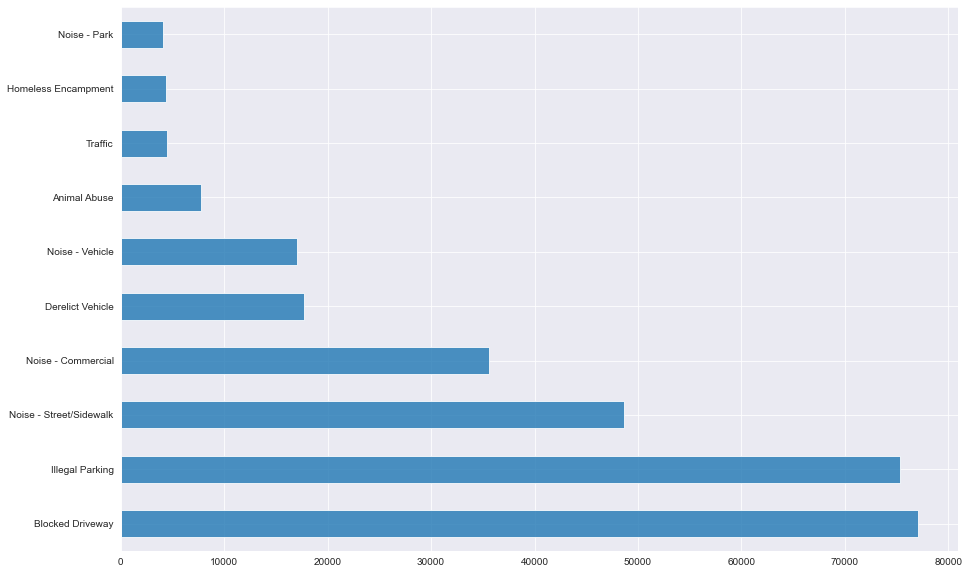

In [11]:
# Count plot to understand the type of the complaint raised
service311['Complaint Type'].value_counts()[:10].plot(kind='barh',alpha=0.8,figsize=(15,10))
plt.show()

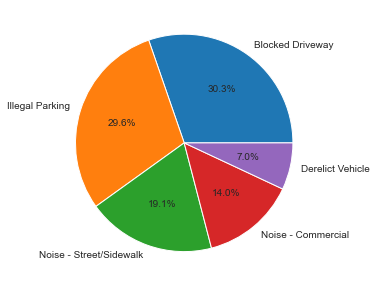

In [12]:
# looking at the Top 5 compliants 
sortedComplaintType = majorcomplaints.head()
plt.figure(figsize=(5,5))
plt.pie(sortedComplaintType['count'],labels=sortedComplaintType["Complaint Type"], autopct="%1.1f%%")
plt.show()

In [13]:
Status=service311.groupby("Status").size()
Status = Status.sort_values(ascending = False).to_frame('count').reset_index()

Status

,Status,count
0,Closed,298471
1,Open,1439
2,Assigned,786
3,Draft,2


In [14]:
#Percentage of Status "Open","Closed"
Percent=[]
for x in (Status["count"]):
    close=round((x/Status["count"].sum()*100),2)
    Percent.append(close)
    
Status["Percent"]=Percent

Status

,Status,count,Percent
0,Closed,298471,99.26
1,Open,1439,0.48
2,Assigned,786,0.26
3,Draft,2,0.00


<p style="color:blue">As of now almost 99% of the cases are closed state.

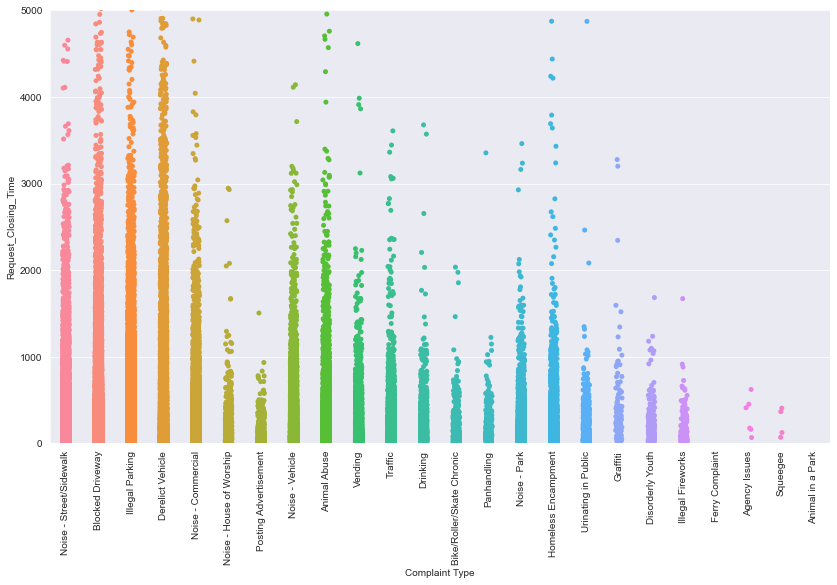

In [15]:
#Categorical Scatter Plot to understand which type of complaints are taking more time to get resolved
g=sns.catplot(x='Complaint Type', y="Request_Closing_Time",data=service311)
g.fig.set_figwidth(15)
g.fig.set_figheight(7)
plt.xticks(rotation=90)
plt.ylim((0,5000))
plt.show()

<p style="color:Blue">As we have got above that almost around 85% of the the requests belongs to transport (Blocked driveway,Illegal Parking, Vehicle Noise, Road Traffic etc ). From this plot we can understand that most of these issues have taken more time to get resolved. Government should take measure in incresing awareness and find some measures to reduce traffic problems.

In [16]:
service311["Agency"].unique()

array(['NYPD'], dtype=object)

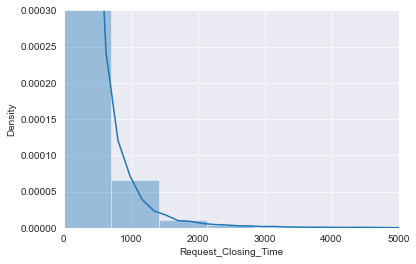

In [17]:
#Univariate Distribution Plot for Request Closing Time
sns.distplot(service311["Request_Closing_Time"])
plt.xlim((0,5000))
plt.ylim((0,0.0003))
plt.show()

In [18]:
service311["Borough"]

0           MANHATTAN
1              QUEENS
2               BRONX
3               BRONX
4              QUEENS
             ...     
300693    Unspecified
300694         QUEENS
300695       BROOKLYN
300696          BRONX
300697      MANHATTAN
Name: Borough, Length: 300698, dtype: object

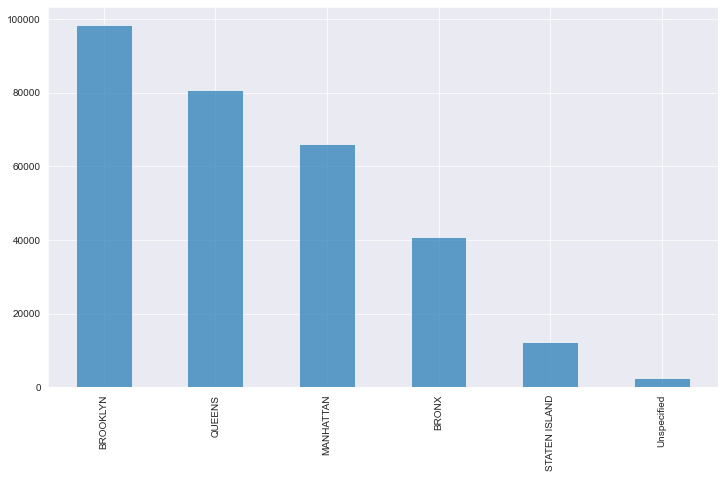

In [19]:
#Count Plot for Borough with the highest complaints
plt.figure(figsize=(12,7))
service311['Borough'].value_counts().plot(kind='bar',alpha=0.7)
plt.show()

In [20]:
#Percentage of cases in each Borough
for x in service311["Borough"].unique():
    print("Percentage of Request from ",x," Division : ",round((service311["Borough"]==x).sum()/len(service311)*100,2))

Percentage of Request from  MANHATTAN  Division :  21.99
Percentage of Request from  QUEENS  Division :  26.82
Percentage of Request from  BRONX  Division :  13.54
Percentage of Request from  BROOKLYN  Division :  32.69
Percentage of Request from  Unspecified  Division :  0.86
Percentage of Request from  STATEN ISLAND  Division :  4.1


In [21]:
#Unique Location Types
service311["Location Type"].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', 'Terminal', nan,
       'Ferry', 'Park'], dtype=object)

In [22]:
#Request Closing Time for all location Type sorted in descending Order
pd.DataFrame(service311.groupby("Location Type")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time", ascending = False)

,Request_Closing_Time
Location Type,
Park,20210.083333
Vacant Lot,448.435498
Commercial,320.566129
Parking Lot,320.130342
Residential Building/House,309.505679
House and Store,300.795699
Residential Building,289.089941
Street/Sidewalk,268.515306
Roadway Tunnel,266.525714


We see that maximum(mean) time to resolve the complaint is taken in Park,Vacant Lot and Commercial areas whereas the cases in the Subway Station and Restaurent are resolved in very less time

In [23]:
service311.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [24]:
#Percentage Of Missing Value
pd.DataFrame((service311.isnull().sum()/service311.shape[0]*100)).sort_values(0,ascending=False)[:20]

,0
School or Citywide Complaint,100.000000
Garage Lot Name,100.000000
Vehicle Type,100.000000
Taxi Pick Up Location,100.000000
Taxi Company Borough,100.000000
Ferry Direction,99.999667
Ferry Terminal Name,99.999335
Road Ramp,99.929165
Bridge Highway Segment,99.929165
Bridge Highway Direction,99.919188


In [25]:
#Remove the column with very high percentage of missing value
new_df=service311.loc[:,(service311.isnull().sum()/service311.shape[0]*100)<=50]

In [26]:
print("Old DataFrame Shape :",service311.shape)
print("New DataFrame Shape : ",new_df.shape)

Old DataFrame Shape : (300698, 54)
New DataFrame Shape :  (300698, 40)


In [27]:
new_df.columns.unique()

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time'],
      dtype='object')

In [28]:
#Remove columns that are not needed for our analysis
rem1=["Unique Key","School Number","School Name","School Region" ,"Facility Type","School Code", "School Phone Number","School Address","School City", "School State", "School Zip","School Not Found","Incident Address","Descriptor","Agency","Agency Name","Park Facility Name","Street Name","Cross Street 1","Cross Street 2","Due Date","Resolution Description","Resolution Action Updated Date","Community Board","X Coordinate (State Plane)","Y Coordinate (State Plane)","Park Borough","Latitude","Longitude","Location"]

new_df.drop(rem1,axis=1,inplace=True)


In [29]:
new_df.head()

,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Address Type,City,Status,Borough,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Closed,MANHATTAN,55.250000
1,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Closed,QUEENS,86.266667
2,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,Street/Sidewalk,10458.0,ADDRESS,BRONX,Closed,BRONX,291.516667
3,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Closed,BRONX,465.233333
4,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Closed,QUEENS,207.033333


In [30]:
new_df.shape

(300698, 10)

In [31]:
new_df.head()

,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Address Type,City,Status,Borough,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Closed,MANHATTAN,55.250000
1,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Closed,QUEENS,86.266667
2,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,Street/Sidewalk,10458.0,ADDRESS,BRONX,Closed,BRONX,291.516667
3,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Closed,BRONX,465.233333
4,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Closed,QUEENS,207.033333


### Hpyothesis Testing

$H_0 : \text{ there is no significant different in mean of Request_Closing_Time for different Complaint}\\
H_1 : \text{there is signficant different in mean of Request_Closing_Time for different Complaint}$

In [32]:
anova_df=pd.DataFrame()
anova_df["Request_Closing_Time"]=new_df["Request_Closing_Time"]
anova_df["Complaint"]=new_df["Complaint Type"]

anova_df.dropna(inplace=True)
anova_df.head()

,Request_Closing_Time,Complaint
0,55.250000,Noise - Street/Sidewalk
1,86.266667,Blocked Driveway
2,291.516667,Blocked Driveway
3,465.233333,Illegal Parking
4,207.033333,Illegal Parking


In [33]:
lm=ols("Request_Closing_Time~Complaint",data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,22.0,1.455049e+09,6.613860e+07,514.177089,0.0
Residual,298511.0,3.839747e+10,1.286300e+05,NaN,NaN


<p style="color:blue;">Since p value for the Complaint is less that 0.01 thus we reject the null hypothesis (Accept the alternative hyptohesis) i.e there is significant difference in the mean response time w.r.t different type of complaint.

**Using Chi Square to test if complaint or service requested and location related?**

$H_0 : \text{Complaint  Type and Location Type are independent}\\
H_1 : \text{Complaint Type and Location Type  are  related}$

In [34]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=new_df["Location Type"]
chi_sq["Complaint Type"]=new_df["Complaint Type"]

# removing missing values
chi_sq.dropna(inplace=True)

In [35]:
data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Complaint Type"])

In [36]:
stat, p, dof, expected = chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

Dependent (reject H0)


<h1 style="color:blue;"><center>Conclusions</h1>
<ul style="color:green;">
    <li>Maximum Complaints are raised in road and parking (vehicle) related sectors</li>
    <li>99.26% of complaints have been resolved with only about 0.48% still unresolved </li>
    <li>Transport and Road related issues are taking more time to get resolved as number of these cases are quite high.</li>
    <li>Number of cases from Borough goes as follows BROOKLYN > QUEENS > MANHATTAN > BRONX > STATEN ISLAND</li>
    <li>Complaint Type are Depentent on Location Type.</li>
    <li>Time taken for solving different complaint type are different</li>
</li>